Plotting transformed images for class: Powdery mildew
Plotting transformed images for class: Healthy
Plotting transformed images for class: Cotton Boll Rot
Plotting transformed images for class: Bacterial blight
Plotting transformed images for class: Aphids
Loaded pretrained weights for efficientnet-b0
Epoch 1/1 - Loss: 1.6738 Acc: 0.1800
Loaded pretrained weights for efficientnet-b0
The image is classified as class: Healthy


NameError: name 'start_time' is not defined

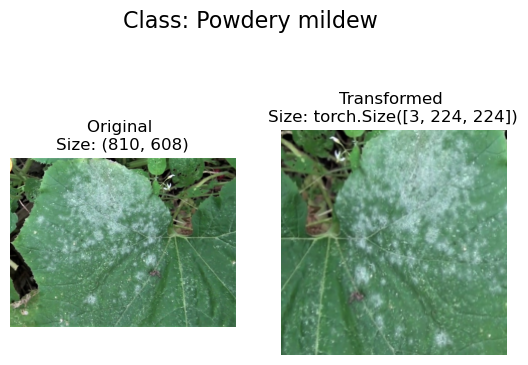

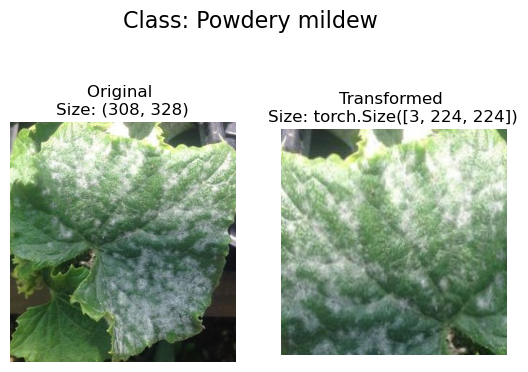

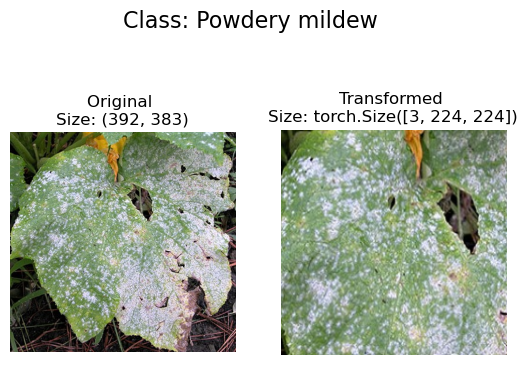

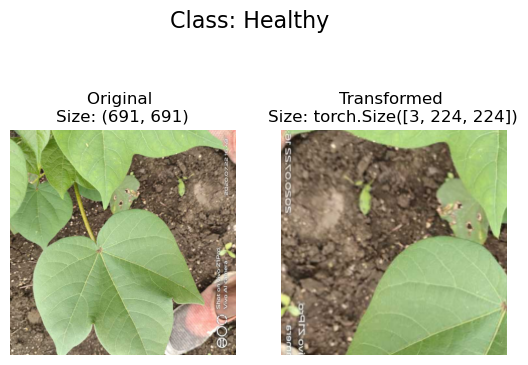

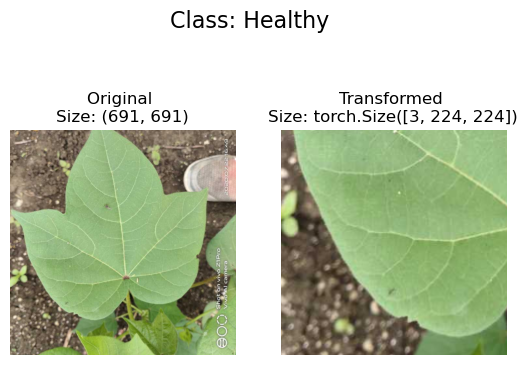

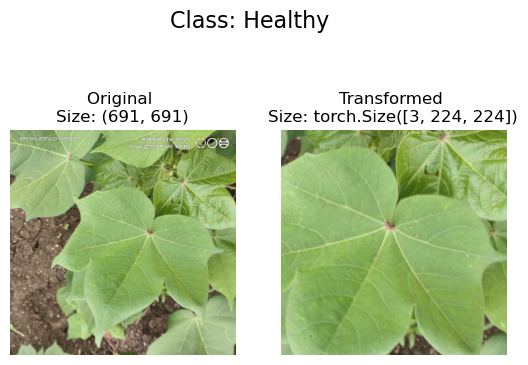

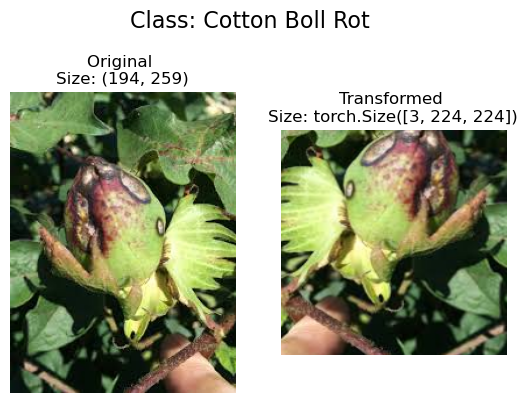

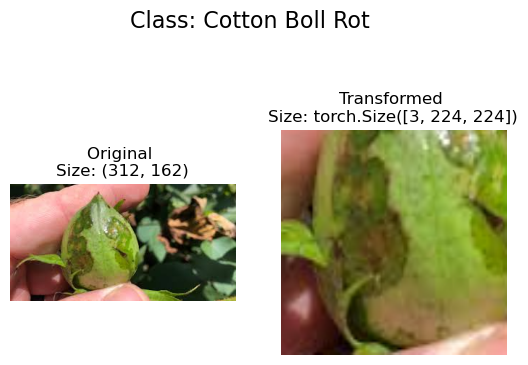

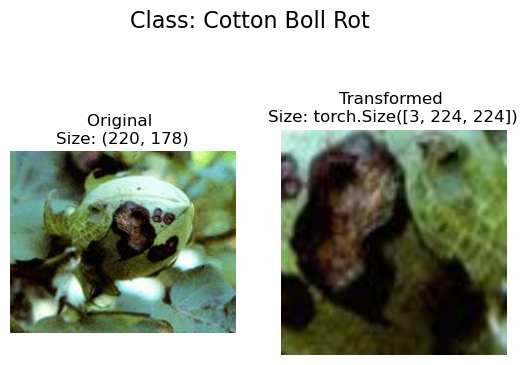

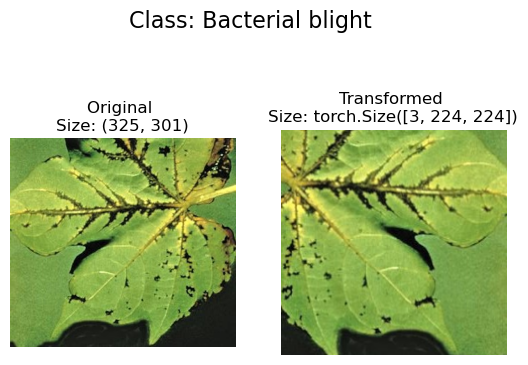

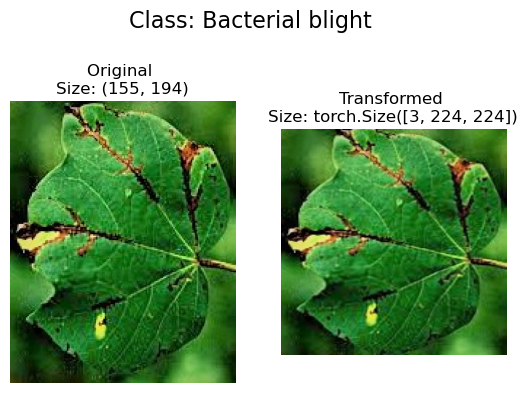

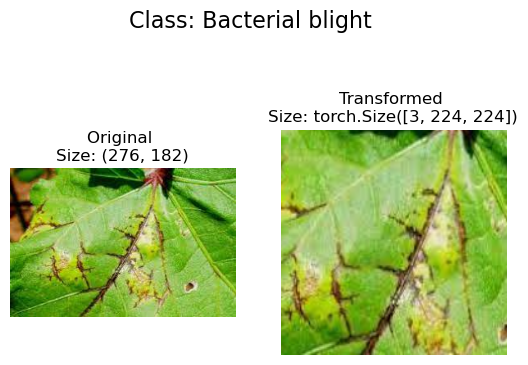

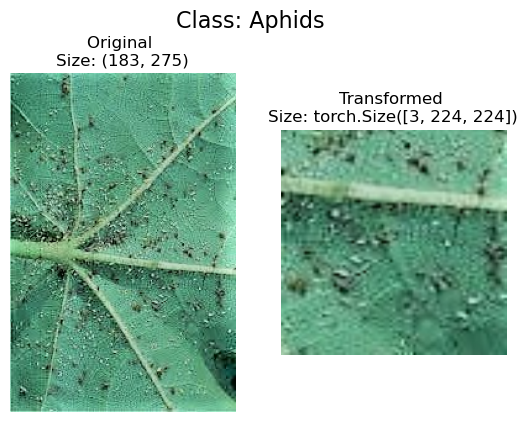

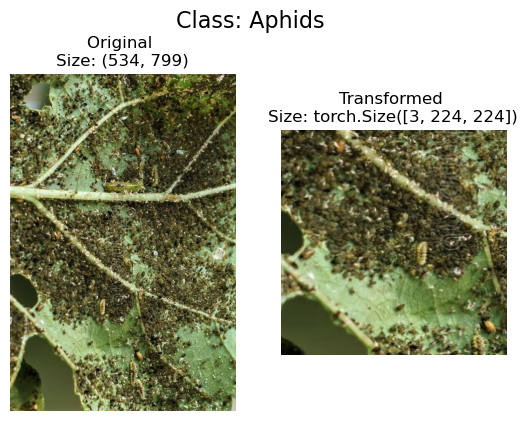

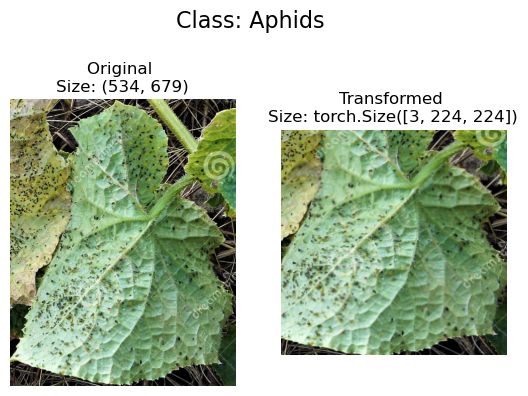

In [10]:
import time
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from PIL import Image
from efficientnet_pytorch import EfficientNet
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as img:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(img)
            ax[0].set_title(f"Original \nSize: {img.size}")
            ax[0].axis("off")

            transformed_image = transform(img)
            ax[1].imshow(transformed_image.permute(1, 2, 0))
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            class_name = os.path.basename(os.path.dirname(image_path))
            fig.suptitle(f"Class: {class_name}", fontsize=16)

data_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Adjust the size as needed
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

main_folder = "C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data\\test"

classes = ["Powdery mildew", "Healthy", "Cotton Boll Rot", "Bacterial blight", "Aphids"]
class_to_idx = {cls: i for i, cls in enumerate(classes)}

class_images = {cls: [] for cls in classes}

for cls in classes:
    class_folder = os.path.join(main_folder, cls)
    for filename in os.listdir(class_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_folder, filename)
            class_images[cls].append(img_path)

image_path_list = {cls: images for cls, images in class_images.items()}

for cls in classes:
    print(f"Plotting transformed images for class: {cls}")
    plot_transformed_images(image_path_list[cls], transform=data_transform, n=3)

train_data = datasets.ImageFolder(root=main_folder, transform=data_transform)
class_names = train_data.classes

train_dataloader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)

# Use EfficientNet-B0 architecture
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    corrects = 0

    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_data)
    epoch_acc = corrects.double() / len(train_data)

    print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

# Save the fine-tuned model
torch.save(model.state_dict(), "efficient_no_image_resize.pth")

# Testing phase
test_image_path = "C:\\Users\\RoopaGanesh\\Downloads\\Cotton_data\\test\\Healthy\\25.jpg"
test_image = Image.open(test_image_path)

data_transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Adjust the size as needed
    transforms.ToTensor()
])

transformed_test_image = data_transform_test(test_image)
transformed_test_image = transformed_test_image.unsqueeze(0)

# Create a new model for testing
model_test = EfficientNet.from_pretrained('efficientnet-b0', num_classes=len(class_names))
model_test.load_state_dict(torch.load("efficient_no_image_resize.pth"))
model_test.eval()
transformed_test_image = transformed_test_image.to(device)
model_test = model_test.to(device)

with torch.no_grad():
    outputs_test = model_test(transformed_test_image)
    _, predicted_test = torch.max(outputs_test, 1)

predicted_class_test = class_names[predicted_test.item()]
print(f"The image is classified as class: {predicted_class_test}")




In [2]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16466 sha256=7faf6e12be81109c4c740c4669c9e5836f7a7b9b092d4c0ec135797fb53ac64b
  Stored in directory: c:\users\roopaganesh\appdata\local\pip\cache\wheels\8b\6f\9b\231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Upgrade pip
!pip install --upgrade pip


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.1 MB 6.3 MB/s eta 0:00:01
   -------------------- ------------------- 1.1/2.1 MB 11.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.1 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 6.7 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\RoopaGanesh\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
